Please use this structure for your report, but you do not have to
slavishly follow this template. All bullet points are merely suggestions
and potential points to discuss in your writeup. Your report should be
no more than 12 pages, including figures. Do not include *any* code or
code output in your report. Indicate your informal collaborators on the
assignment, if you had any.

# Introduction

Things to potentially include in your introduction:

-   Describe the problem of interest and put your analysis in the domain
    context. Read the introduction of the two Nerbonne and Kertzschmar
    papers for some help here.

-   What do you aim to learn from this data?

-   Outline what you will be doing in the rest of the report/analysis

# The Data {#data}

-   What is the data that you will be looking at?

-   Provide a brief overview of the data

-   How is this data relevant to the problem of interest? In other
    words, make the link between the data and the domain problem

In [ ]:
pip install --upgrade numpy scipy seaborn matplotlib


  Using cached numpy-2.1.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.1.1-cp312-cp312-macosx_11_0_arm64.whl (13.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pyreadr import read_r
import numpy as np

# Load the data
ling_data = pd.read_csv('../data/lingData.txt', sep='\\s+')
ling_location = pd.read_csv('../data/lingLocation.txt', sep='\\s+')

# ling_data has a column for each question, and ling_location has a column
# for each question x answer.  Sorry the columns in ling_location are not usefully named,
# but it's not too tricky to figure out which is which.
# Note that you still need to clean this data (check for NA's, missing location data, etc.)

# Load the question_data which contains quest.mat, quest.use, ans.---
question_data = read_r('../data/question_data.RData')

In [ ]:
# Inspect column names
print(ling_data.columns)
print(ling_location.columns)

# Load state geometries
state_df = gpd.read_file('../data/shapefiles')
state_df = state_df[state_df['iso_a2'] == 'US']  # Filter to only US

Index(['ID', 'CITY', 'STATE', 'ZIP', 'Q050', 'Q051', 'Q052', 'Q053', 'Q054',
       'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
       'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
       'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
       'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
       'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
       'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'lat',
       'long'],
      dtype='object')
Index(['Number of people in cell', 'Latitude', 'Longitude', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10',
       ...
       'V462', 'V463', 'V464', 'V465', 'V466', 'V467', 'V468', 'V469', 'V470',
       'V471'],
      dtype='object', length=471)


In [ ]:
# Inspect column names
print(ling_data.columns)
print(ling_location.columns)

# Load state geometries
state_df = gpd.read_file('../data/shapefiles')
state_df = state_df[state_df['iso_a2'] == 'US']  # Filter to only US

Index(['ID', 'CITY', 'STATE', 'ZIP', 'Q050', 'Q051', 'Q052', 'Q053', 'Q054',
       'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
       'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
       'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
       'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
       'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
       'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'lat',
       'long'],
      dtype='object')
Index(['Number of people in cell', 'Latitude', 'Longitude', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10',
       ...
       'V462', 'V463', 'V464', 'V465', 'V466', 'V467', 'V468', 'V469', 'V470',
       'V471'],
      dtype='object', length=471)


In [ ]:
ling_data.head()

ID        CITY STATE    ZIP  Q050  Q051  Q052  Q053  Q054  Q055  ...  Q110  \
0   1       Boise    ID  83704     4     1     3     2     3     1  ...     8   
1   2  Pittsfield    MA   1201     4     2     3     2     2     2  ...     8   
2   3  Burlington    VT   5401     4     1     2     2     2     2  ...     4   
3   4      Easton    PA  18042     7     1     1     2     2     2  ...     8   
4   5     Bedford    MA   1730     8     2     3     1     2     2  ...     8   

   Q111  Q115  Q117  Q118  Q119  Q120  Q121        lat        long  
0     2     1     6     7     3     2     3  43.631230 -116.287161  
1     2     1     1     7     1     1     3  42.453840  -73.254003  
2     2     1     4     7     1     2     1  44.484038  -73.221265  
3     1     1     3     7     1     2     1  40.681798  -75.220820  
4     3     1     5     8     1     1     1  42.496679  -71.275046  

[5 rows x 73 columns]

In [ ]:
# load .Rdata file
from pyreadr import read_r
question_data = read_r('/Users/lloydconnelly/stat-215-a/lab2/data/question_data.RData')

In [ ]:
question_data.values()

odict_values([   qnum ans.let    per                                                ans
0     1       a   9.62                               {ah.gif} as in 'ah' 
1     1       b  75.15                             {ash.gif} as in 'ant' 
2     1       c   2.77                   {backwardsa.gif} as in 'caught' 
3     1       d   2.52  I have the same vowel in 'ah', 'caught', and '...
4     1       e   0.58                I pronounce it the same as 'ain't' 
5     1       f   6.64  I use {ah.gif}/{backwardsa.gif} when referring...
6     1       g   1.84  I use {ash.gif} when referring to the general ...
7     1       h   0.88                                             other ,    qnum ans.let    per                                                ans
0    10       a  88.57                                  [i:] as in 'see' 
1    10       b   3.85                              {ih.gif} as in 'sit' 
2    10       c   5.13                        I use both interchangeably 
3    10       d   0.04 

In [ ]:
for key, value in question_data.items():
    print(f"Key: {key}")
    print("Value:")
    print(value)
    print("\n")  # Add a newline for better readability


Key: ans.1
Value:
   qnum ans.let    per                                                ans
0     1       a   9.62                               {ah.gif} as in 'ah' 
1     1       b  75.15                             {ash.gif} as in 'ant' 
2     1       c   2.77                   {backwardsa.gif} as in 'caught' 
3     1       d   2.52  I have the same vowel in 'ah', 'caught', and '...
4     1       e   0.58                I pronounce it the same as 'ain't' 
5     1       f   6.64  I use {ah.gif}/{backwardsa.gif} when referring...
6     1       g   1.84  I use {ash.gif} when referring to the general ...
7     1       h   0.88                                             other 


Key: ans.10
Value:
   qnum ans.let    per                                                ans
0    10       a  88.57                                  [i:] as in 'see' 
1    10       b   3.85                              {ih.gif} as in 'sit' 
2    10       c   5.13                        I use both interchangeably 

In [ ]:
def map_responses(df, question_code):
    # Get answer descriptions for the question
    answers_key = f'ans.{question_code[1:]}'
    if answers_key not in question_data:
        print(f"No answers found for {question_code}")
        return df
    
    answers = question_data[answers_key].copy()
    if 'ans' not in answers.columns:
        print(f"No 'ans' column found in answers for {question_code}")
        return df
    
    # Verify the response codes in 'answers' and 'df'
    print(f"Unique response codes in df[{question_code}]:", df[question_code].unique())
    print(f"Indices in answers:", answers.index)
    
    # Create 'code' column based on actual response codes
    # Check if 'code' is already a column in 'answers'
    if 'code' not in answers.columns:
        # If 'answers' has a 'code' column or the codes are in the index
        if 'code' in answers.index.names:
            answers.reset_index(inplace=True)
        else:
            answers['code'] = answers.index.astype(str)
    answers['code'] = answers['code'].astype(str)
    
    # Map response codes to descriptions
    df[question_code] = df[question_code].astype(str)
    df = df.merge(answers[['code', 'ans']], left_on=question_code, right_on='code', how='left')
    df.rename(columns={'ans': f'{question_code}_desc'}, inplace=True)
    df.drop('code', axis=1, inplace=True)
    # Drop rows where '{question_code}_desc' is NaN or 'other'
    df = df[
        df[f'{question_code}_desc'].notna() &
        (df[f'{question_code}_desc'].str.strip().str.lower() != 'other')
    ]

    return df


In [ ]:
ling_data_filtered = map_responses(ling_data_filtered, 'Q100')

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/1807789486.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



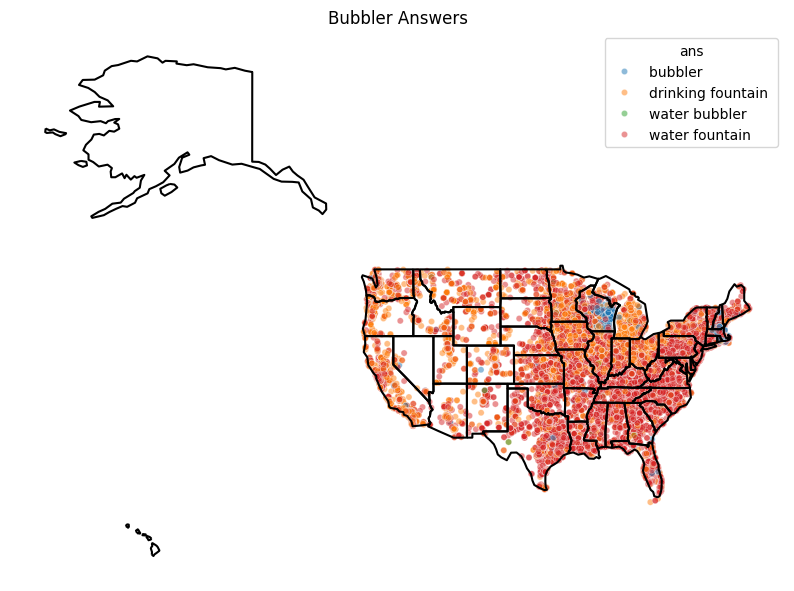

In [ ]:
# Define the map theme
def my_map_theme():
    plt.axis('off')
# Note: the below plots are *ugly*. You can make nicer plots!

############
# Plot for the bubbler answers
bubbler = ling_data[(ling_data['Q103'].isin([1, 2, 3,4])) & (ling_data['long'] > -125)]
answers_q103 = question_data['ans.103']

# Prepare to join
answers_q103['Q103'] = (answers_q103.index + 1).astype(str)
bubbler['Q103'] = bubbler['Q103'].astype(str)
bubbler = bubbler.merge(answers_q103, on='Q103', how='inner')
# remove unused categories
bubbler['ans'] = bubbler['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=bubbler, x='long', y='lat', hue='ans', s=20, alpha=0.5)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("Bubbler Answers")
plt.show()

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/489159395.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



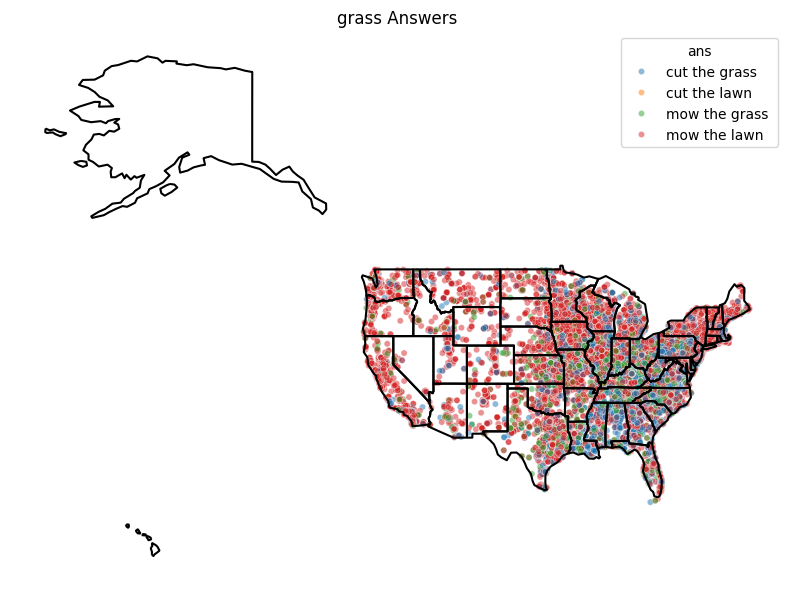

ID        CITY STATE    ZIP  Q050  Q051  Q052  Q053  Q054  Q055  \
0          2  Pittsfield    MA   1201     4     2     3     2     2     2   
1          3  Burlington    VT   5401     4     1     2     2     2     2   
2          5     Bedford    MA   1730     8     2     3     1     2     2   
3          6   SugarLand    TX  77479     8     2     1     2     2     2   
4          7    scituate    MA   2066     7     2     3     2     2     2   
...      ...         ...   ...    ...   ...   ...   ...   ...   ...   ...   
41114  50060  Wilmington    NC  28443     4     2     1     2     2     2   
41115  50061  Cincinnati    OH  45231     7     2     3     2     2     2   
41116  50062     BayCity    MI  48706     1     1     1     2     2     2   
41117  50063     seattle    WA  98103     4     2     1     2     2     2   
41118  50064  Cincinnati    OH  45069     4     2     1     2     2     2   

       ...  Q118  Q119  Q120  Q121        lat        long  qnum  ans.let  \
0      ...     7     1     1     3  42.453840  -73.254003   100        d   
1      ...     7     1     2     1  44.484038  -73.221265   100        d   
2      ...     8     1     1     1  42.496679  -71.275046   100        d   
3      ...     2     1     2     3  29.573345  -95.632132   100        a   
4      ...     7     1     2     3  42.205038  -70.751306   100        d   
...    ...   ...   ...   ...   ...        ...         ...   ...      ...   
41114  ...     7     3     2     3  34.407677  -77.652381   100        d   
41115  ...     6     2     6     6  39.242608  -84.545305   100        d   
41116  ...     7     1     2     3  43.607523  -83.916202   100        a   
41117  ...     7     1     2     3  47.671346 -122.341662   100        a   
41118  ...     8     1     2     3  39.343757  -84.402490   100        d   

         per             ans  
0      66.79   mow the lawn   
1      66.79   mow the lawn   
2      66.79   mow the lawn   
3      18.38  cut the grass   
4      66.79   mow the lawn   
...      ...             ...  
41114  66.79   mow the lawn   
41115  66.79   mow the lawn   
41116  18.38  cut the grass   
41117  18.38  cut the grass   
41118  66.79   mow the lawn   

[41119 rows x 77 columns]

In [ ]:


############
# Plot for the grass answers
grass = ling_data[(ling_data['Q100'].isin([1, 2, 3,4])) & (ling_data['long'] > -125)]
answers_q100 = question_data['ans.100']

# Prepare to join
answers_q100['Q100'] = (answers_q100.index + 1).astype(str)
grass['Q100'] = grass['Q100'].astype(str)
grass = grass.merge(answers_q100, on='Q100', how='inner')
# remove unused categories
grass['ans'] = grass['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=grass, x='long', y='lat', hue='ans', s=20, alpha=0.5)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("grass Answers")
plt.show()
grass

In [ ]:
question_data['ans.103']

qnum ans.let    per                 ans Q103 code
0   103       a   3.84            bubbler     1    1
1   103       b   0.30      water bubbler     2    2
2   103       c  33.16  drinking fountain     3    3
3   103       d  60.97     water fountain     4    4
4   103       e   1.74              other     5    5

In [ ]:
print(ling_data['Q100'].unique())

[0 4 5 1 3 2]


In [ ]:
print(question_data['ans.100'])


   qnum ans.let    per             ans Q100 code
0   100       a  18.38  cut the grass     1    1
1   100       b   0.64   cut the lawn     2    2
2   100       c   5.75  mow the grass     3    3
3   100       d  66.79   mow the lawn     4    4
4   100       e   8.43          other     5    5


In [ ]:
# Assuming you selected questions Q1 and Q2
questions_of_interest = ['Q103', 'Q100']  # Replace with your question codes

# Filter data to include only relevant questions
ling_data_filtered = ling_data[['ID', 'lat', 'long'] + questions_of_interest]

# Drop rows with missing responses
ling_data_filtered.dropna(subset=questions_of_interest, inplace=True)

# Function to map response codes to descriptions
def map_responses(df, question_code):
    # Get answer descriptions for the question
    answers = question_data[f'ans.{question_code[1:]}']
    answers['code'] = (answers.index + 1).astype(str)
    
    # Map response codes to descriptions
    df[question_code] = df[question_code].astype(str)
    df = df.merge(answers[['code', 'ans']], left_on=question_code, right_on='code', how='left')
    df.rename(columns={'ans': f'{question_code}_desc'}, inplace=True)
    df.drop('code', axis=1, inplace=True)
    # Drop rows where 'Q_des' is NaN or 'other'
    df = df[(df[f'{question_code}_desc'].notna()) & (df[f'{question_code}_desc'] != 'other')]

    return df

# Apply mapping for both questions
ling_data_filtered = map_responses(ling_data_filtered, 'Q103')
ling_data_filtered = map_responses(ling_data_filtered, 'Q100')


/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/578613037.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/578613037.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ling_data_filtered.head()   

ID        lat       long Q103 Q100           Q103_desc       Q100_desc
1   2  42.453840 -73.254003    4    4     water fountain    mow the lawn 
2   3  44.484038 -73.221265    3    4  drinking fountain    mow the lawn 
3   4  40.681798 -75.220820    4    5     water fountain           other 
4   5  42.496679 -71.275046    4    4     water fountain    mow the lawn 
5   6  29.573345 -95.632132    4    1     water fountain   cut the grass

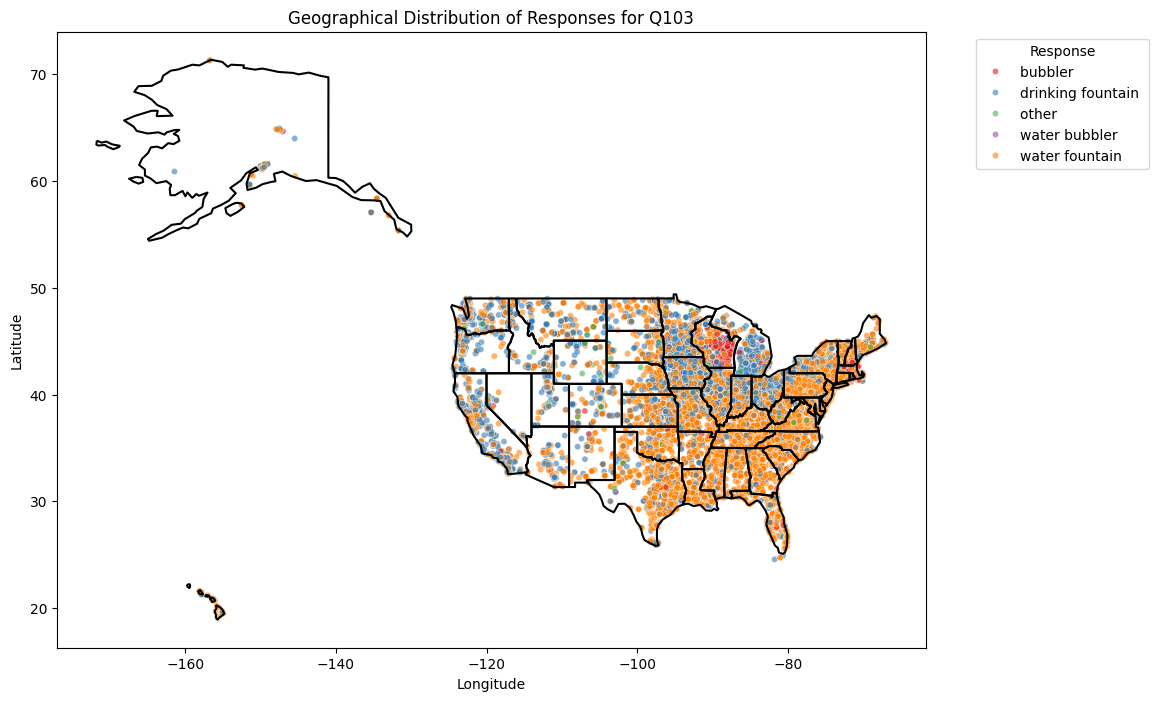

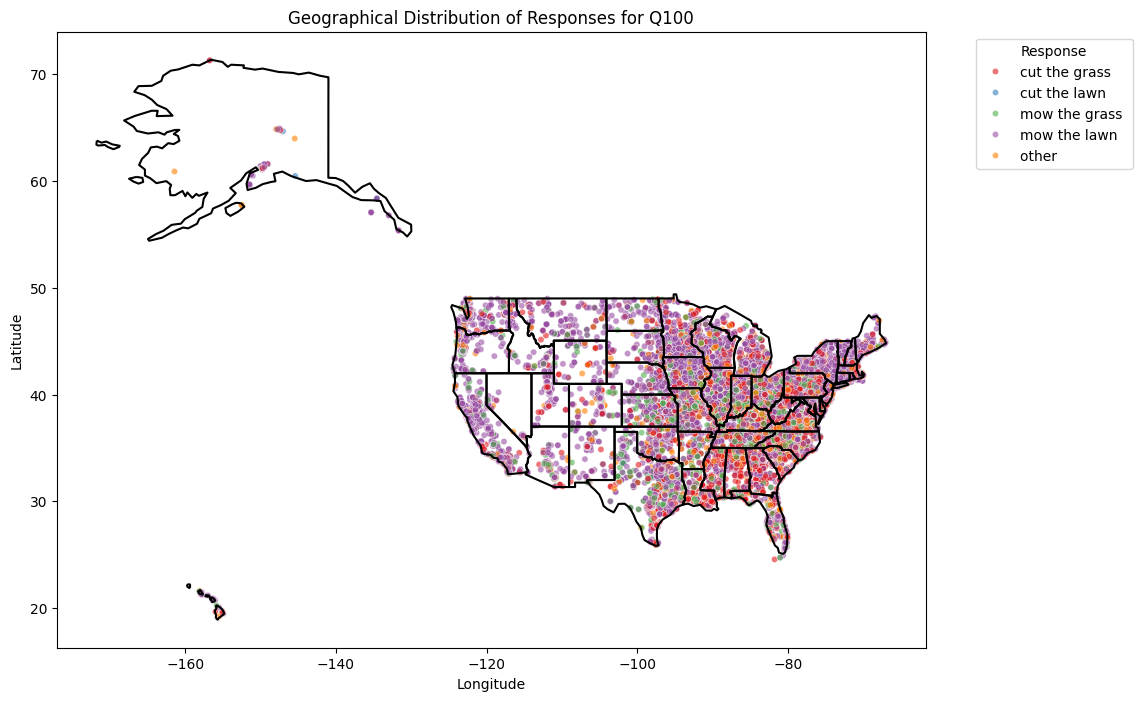

In [ ]:


def plot_question_map(df, question_code):
    plt.figure(figsize=(12, 8))
    
    # Determine the hue column
    if question_code == 'Combined_Response':
        hue_column = question_code
    else:
        hue_column = f'{question_code}_desc'
    
    sns.scatterplot(
        data=df, x='long', y='lat', hue=hue_column,
        s=20, alpha=0.6, palette='Set1'
    )
    state_gdf.boundary.plot(ax=plt.gca(), color='black')
    plt.title(f"Geographical Distribution of Responses for {question_code}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Plot for each question
plot_question_map(ling_data_filtered, 'Q103')
plot_question_map(ling_data_filtered, 'Q100')


In [ ]:
! pip install plotly

import plotly.express as px

def plot_interactive_map(df, question_code):
    fig = px.scatter_mapbox(
        df, lat='lat', lon='long', color=question_code,
        zoom=3, mapbox_style='carto-positron',
        title=f"Interactive Map of Responses for {question_code}"
    )
    fig.show()

# Plot interactive maps
plot_interactive_map(grass, 'ans')
plot_interactive_map(bubbler, 'ans')


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(
    bubbler['ans'],
    grass['ans'],
    margins=True
)
print(contingency_table)


ans                 cut the grass   cut the lawn   mow the grass   \
ans                                                                 
bubbler                        326             13             118   
drinking fountain             3179            104            1098   
water bubbler                   19              1               9   
water fountain                5570            143            2046   
All                           9094            261            3271   

ans                 mow the lawn     All  
ans                                       
bubbler                      1091   1548  
drinking fountain            9912  14293  
water bubbler                  74    103  
water fountain              17416  25175  
All                         28493  41119  


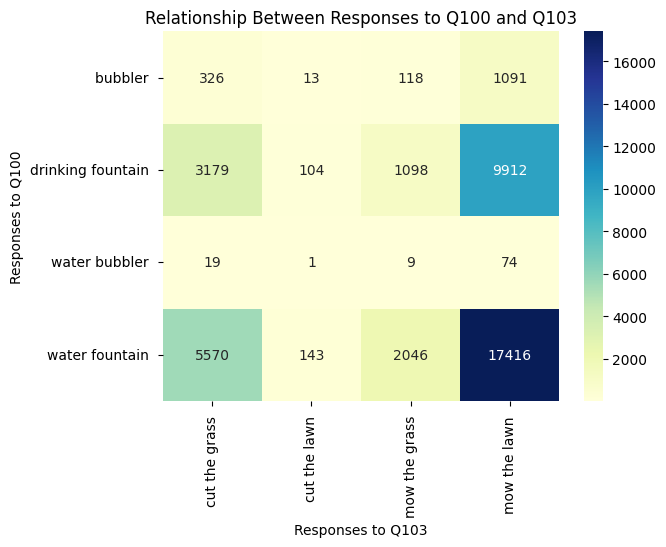

In [ ]:
sns.heatmap(
    contingency_table.iloc[:-1, :-1],
    annot=True, fmt='d', cmap='YlGnBu'
)
plt.title('Relationship Between Responses to Q100 and Q103')
plt.xlabel('Responses to Q103')
plt.ylabel('Responses to Q100')
plt.show()


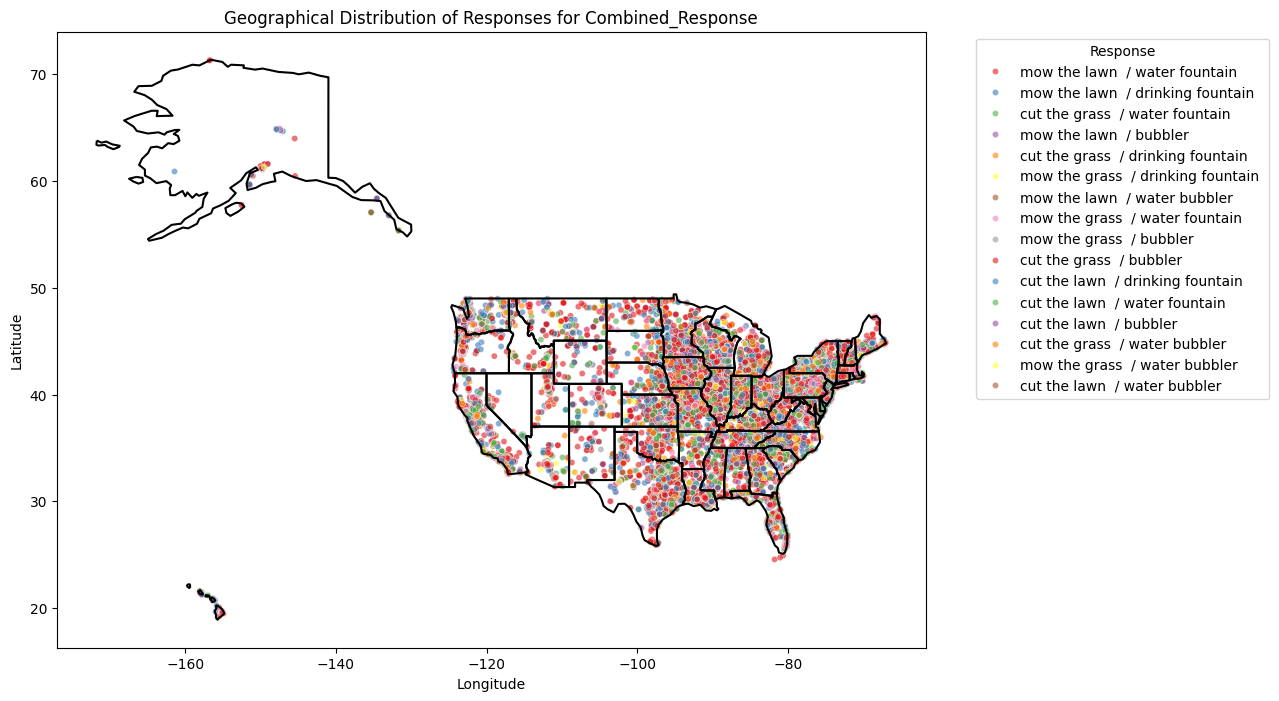

In [ ]:
# Create a new column for combined responses
ling_data_filtered['Combined_Response'] = (
    grass['ans'].astype(str) + ' / ' + bubbler['ans'].astype(str)
)


# Plot the combined responses
plot_question_map(ling_data_filtered, 'Combined_Response')


In [ ]:
from scipy.stats import chi2_contingency

# Prepare the contingency table without margins
contingency = pd.crosstab(
    grass['ans'],
    bubbler['ans']
)

# Perform the chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant association between the responses.")
else:
    print("No significant association found between the responses.")


Chi-squared Test Statistic: 9.461860370074216
P-value: 0.39577712954824185
No significant association found between the responses.


Encode the data so that the response is binary instead of categorical. In the previous example of
John and Paul, the encoded binary vectors would be (1, 0, 0, 0, 0, 0, 1) for John and (0, 1, 0, 0, 0, 0, 1)
for Paul. (You might want to do this for the previous question as well.) This makes p = 468 and
n = 47, 471. Experiment with dimension reduction techniques. What do you see? If you do not see
anything, change your projection. Does that make things look different? Did you center and/or scale
your data before performing dimension reduction? Discuss your choice of centering/scaling. Why is
it not a good idea to perform PCA or other dimension reduction techniques on the original lingData
dataset?

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/3339115619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)


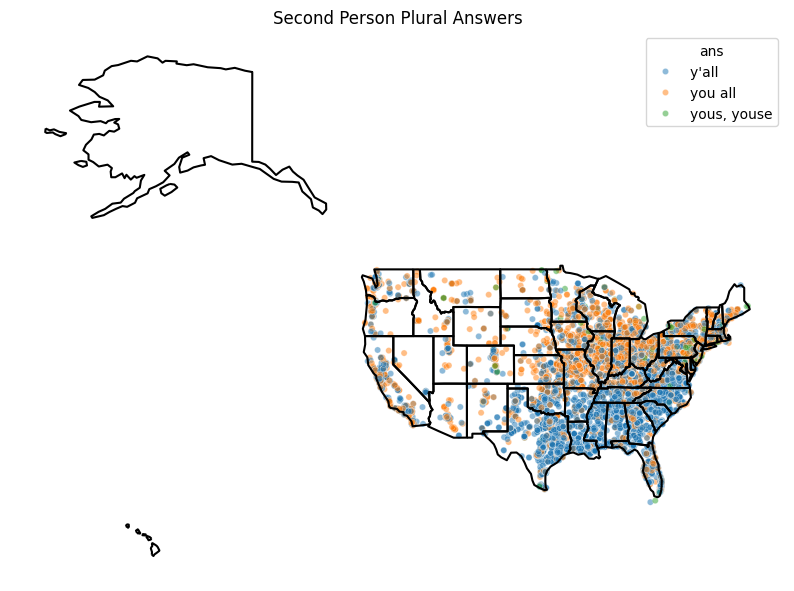

In [ ]:
# Define the map theme
def my_map_theme():
    plt.axis('off')
# Note: the below plots are *ugly*. You can make nicer plots!

############
# Plot for the second person plural answers
plural_second_person = ling_data[(ling_data['Q050'].isin([1, 2, 9])) & (ling_data['long'] > -125)]
answers_q50 = question_data['ans.50']

# Prepare to join
answers_q50['Q050'] = (answers_q50.index + 1).astype(str)
plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)
plural_second_person = plural_second_person.merge(answers_q50, on='Q050', how='inner')
# remove unused categories
plural_second_person['ans'] = plural_second_person['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plural_second_person, x='long', y='lat', hue='ans', s=20, alpha=0.5)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("Second Person Plural Answers")
plt.show()

## Data Cleaning

-   This dataset isn't as bad as the TBI data, but there are still some
    issues. You should discuss them here and describe your strategies
    for dealing with them.

-   Remember to record your preprocessing steps and to be transparent!

## Exploratory Data Analysis {#data-exploration}

-   This is where you compare pairs of questions with discussion and
    plots.

# Dimension Reduction

-   This is where you discuss and show plots about the results of
    whatever dimension reduction techniques you tried---PCA, variants of
    PCA, t-SNE, NMF, random projections, etc.

-   What do you learn from your dimension reduction outputs

-   Discuss centering and scaling decisions

# Clustering

-   This is where you discuss and show plots about the results of
    whatever clustering methods you tried---k-means, hierarchical
    clustering, NMF, etc.

# Stability of findings to perturbation

-   What happens to your clusters when you perturb the data set?

-   What happens when you re-run the algorithm with different starting
    points?

# Conclusion

-   Discuss the three realms of data science by answering the questions
    in the instructions pdf.

-   Come up with a reality check that would help you to verify your
    clustering. You do not necessarily have to perform this reality
    check, but you can if doable.

-   What are the main takeaways from your
    exploration/clustering/stability analysis?

# Academic Honesty {#academic-integrity-statement}

## Statement

Please include your academic honesty statement here. Do NOT include your
name.

## LLM Usage

If, in accordance with the policy in `lab2-instructions.pdf`, you used
the one exception to the LLM ban to help complete the lab, please see
the instructions for what to write here.

## Collaborators

List your collaborators here.


# Bibliography

Include any references you used in your report here.